**讀取影像**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(220, 220, 3)


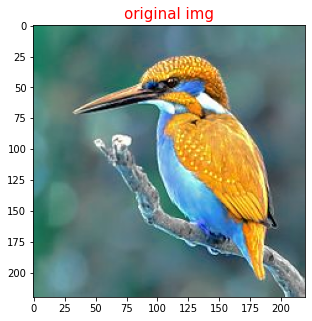

In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/week14.jpg", -1)
print(img.shape)

plt.figure(figsize = (5, 5))

plt.title('original img', fontsize = 15, color = 'r')
plt.imshow(img, cmap = 'gray')

**生成灰階影像**

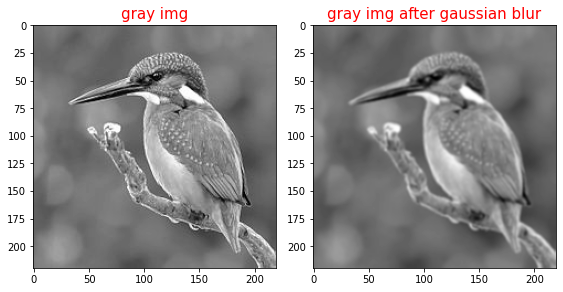

In [ ]:
plt.figure(figsize = (8, 8))

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #將讀取的影像轉換為灰階影像
plt.subplot(1, 2, 1)
plt.title("gray img", fontsize = 15, color = 'r')
plt.imshow(gray_img, cmap = 'gray')

gaussian_img = cv2.GaussianBlur(gray_img, (5, 5), 0)  #將讀取的影像透過高斯濾波將影像平滑化，以此來減少背景躁點
plt.subplot(1, 2, 2)
plt.title("gray img after gaussian blur", fontsize = 15, color = 'r')
plt.imshow(gaussian_img, cmap = 'gray')

plt.tight_layout()

**生成影像邊緣**

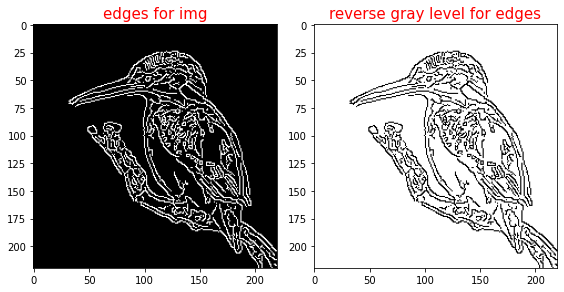

In [ ]:
def change(img):  #對影像灰階值做倒數
    nr, nc = img.shape[:2]
    new_img = np.zeros((nr, nc), np.uint8)  #建立一新影像且灰階值為0

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:  #若傳進來的影像目前位置灰階值為0，則新影像同樣位置灰階值設為1
                new_img[x][y] = 255

    return new_img  #回傳該影像

plt.figure(figsize = (8, 8))

edges_img = cv2.Canny(gaussian_img, 5, 90)  #影像邊緣偵測
plt.subplot(1, 2, 1)
plt.title("edges for img", fontsize = 15, color = 'r')
plt.imshow(edges_img, cmap = 'gray')

edges_img = change(edges_img)  #因為Canny所生成之邊緣影像的邊緣為白色背景為黑色，故將其顛倒
plt.subplot(1, 2, 2)
plt.title("reverse gray level for edges", fontsize = 15, color = 'r')
plt.imshow(edges_img, cmap = 'gray')

plt.tight_layout()

**將未經過高斯濾波的灰階影像二值化**

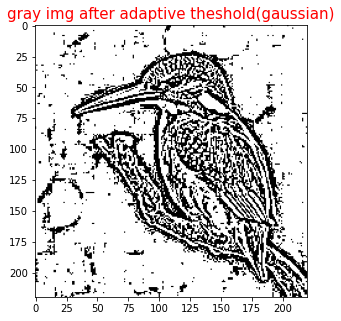

In [ ]:
adaptive_theshold_gaussian = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)  #將影像透過高斯法的適應性閥值化來將灰階影像變為只有黑白兩色

plt.figure(figsize = (5, 5))

plt.title('gray img after adaptive theshold(gaussian)', fontsize = 15, color = 'r')
plt.imshow(adaptive_theshold_gaussian, cmap = 'gray')

**透過邊緣資訊來將二值化後的影像中不必要的地方刪除**

**用經過高斯濾波的邊緣資訊以及未經過高斯濾波的二值化影像生成影像**

(220, 220)


True

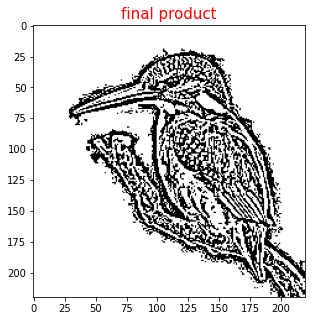

In [ ]:
def reduce_noise(img, edges, radius):  #若灰階影像中各相素點半徑(radius)內邊緣影像有值則將其保留，若否則將該相素點刪除
    nr, nc = img.shape[:2]
    new_img = img.copy()  #複製一新影像
    has_edges = 0  #檢測半徑內是否有邊緣資訊
    edges_x = edges_y = 0  #紀錄半徑內的X,Y軸的值

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:
                for round_x in range(2 * radius + 1):  #檢測目前位置加上或減去半徑後是否會超過影像範圍
                    for round_y in range(2 * radius + 1):
                        if (x - radius + round_x) < 0:
                            edges_x = 0

                        elif (x - radius + round_x) >= nr:
                            edges_x = nr - 1

                        else:
                            edges_x = x - radius + round_x

                        if (y - radius + round_y) < 0:
                            edges_y = 0

                        elif (y - radius + round_y) >= nc:
                            edges_y = nc - 1

                        else:
                            edges_y = y - radius + round_y

                        if edges[edges_x][edges_y] == 0:  #若在半徑內有邊緣資訊，則記錄有邊緣
                          has_edges = 1

            if has_edges == 0:  #若半徑內無邊緣資訊則將新影像的該點的灰階值設為255
                new_img[x][y] = 255
            
            has_edges = 0

    return new_img

reduce_noise_img = reduce_noise(adaptive_theshold_gaussian, edges_img, 6)  #透過邊緣資訊來將不必要的地方刪除

print(reduce_noise_img.shape)

plt.figure(figsize = (5, 5))

plt.title('final product', fontsize = 15, color = 'r')
plt.imshow(reduce_noise_img, cmap = 'gray')

cv2.imwrite('/content/drive/My Drive/Colab Notebooks/image_processing/endterm project.bmp', img)  #將轉好的影戲存起來

**當灰階影像的半徑(r)含有邊緣影像時，半徑0-10所生成之影像**

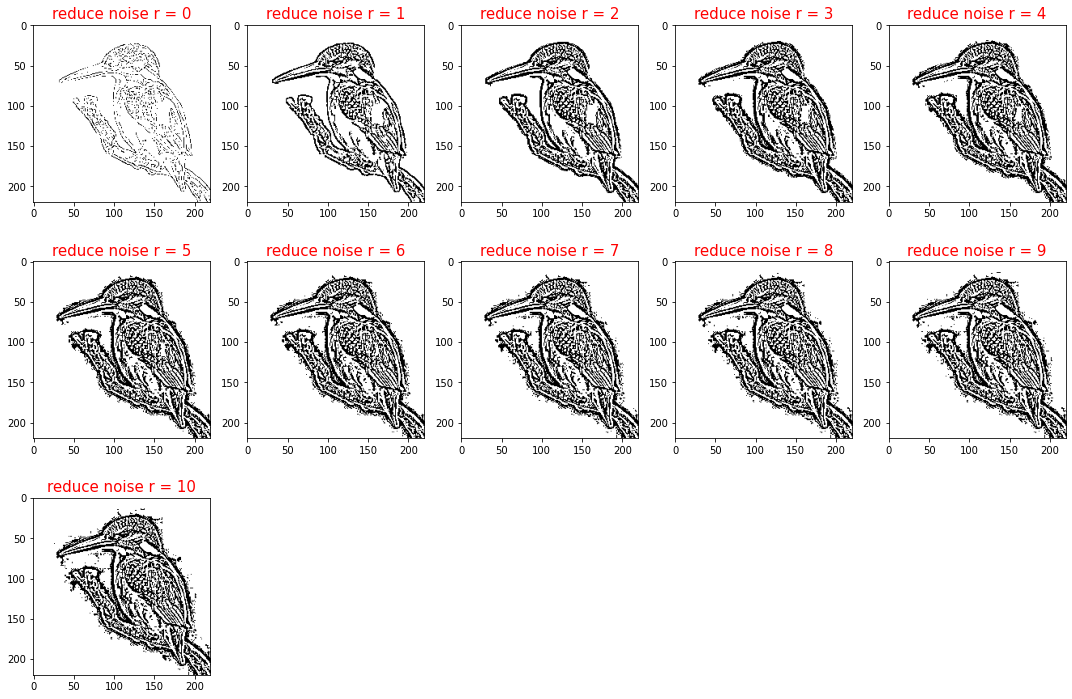

In [ ]:
r0 = reduce_noise(adaptive_theshold_gaussian, edges_img, 0)
r1 = reduce_noise(adaptive_theshold_gaussian, edges_img, 1)
r2 = reduce_noise(adaptive_theshold_gaussian, edges_img, 2)
r3 = reduce_noise(adaptive_theshold_gaussian, edges_img, 3)
r4 = reduce_noise(adaptive_theshold_gaussian, edges_img, 4)
r5 = reduce_noise(adaptive_theshold_gaussian, edges_img, 5)
r6 = reduce_noise(adaptive_theshold_gaussian, edges_img, 6)
r7 = reduce_noise(adaptive_theshold_gaussian, edges_img, 7)
r8 = reduce_noise(adaptive_theshold_gaussian, edges_img, 8)
r9 = reduce_noise(adaptive_theshold_gaussian, edges_img, 9)
r10 = reduce_noise(adaptive_theshold_gaussian, edges_img, 10)


imgs = [r0, r1, r2, r3, r4, r5, r6, r7, r8, r9, r10]
titles = ['reduce noise r = 0', 'reduce noise r = 1', 'reduce noise r = 2', 'reduce noise r = 3', \
        'reduce noise r = 4', 'reduce noise r = 5', 'reduce noise r = 6', 'reduce noise r = 7', \
        'reduce noise r = 8', 'reduce noise r = 9', 'reduce noise r = 10']
plt.figure(figsize = (15, 10))

for i in range(11):
    plt.subplot(3, 5, i + 1)
    plt.title(titles[i], fontsize = 15, color = 'r')
    plt.imshow(imgs[i], cmap = 'gray')

plt.tight_layout()
plt.show()

**使用未經過高斯濾波的灰階影像的邊緣資訊**

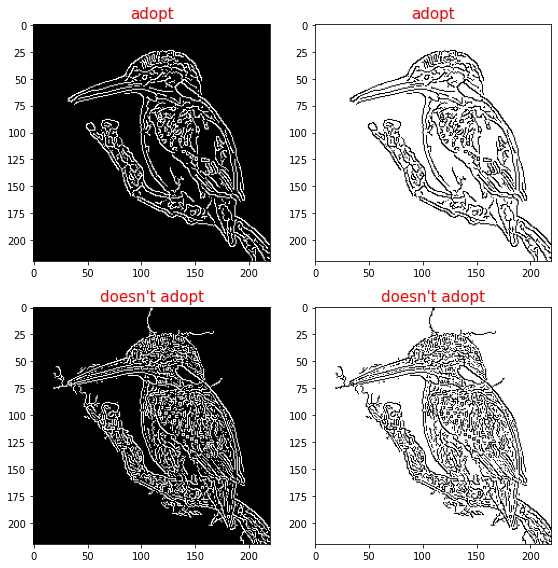

In [ ]:
plt.figure(figsize = (8, 8))

#採納的
edges_img = cv2.Canny(gaussian_img, 5, 90)  #影像邊緣偵測
plt.subplot(2, 2, 1)
plt.title("adopt", fontsize = 15, color = 'r')
plt.imshow(edges_img, cmap = 'gray')

edges_img = change(edges_img)
plt.subplot(2, 2, 2)
plt.title("adopt", fontsize = 15, color = 'r')
plt.imshow(edges_img, cmap = 'gray')

#未採納的
nonadopt_edges_img = cv2.Canny(gray_img, 5, 90)  #影像邊緣偵測(未經高斯濾波處理的)
plt.subplot(2, 2, 3)
plt.title("doesn't adopt", fontsize = 15, color = 'r')
plt.imshow(nonadopt_edges_img, cmap = 'gray')

nonadopt_edges_img = change(nonadopt_edges_img)
plt.subplot(2, 2, 4)
plt.title("doesn't adopt", fontsize = 15, color = 'r')
plt.imshow(nonadopt_edges_img, cmap = 'gray')

plt.tight_layout()

**將經過高斯濾波後的灰階影像二值化**

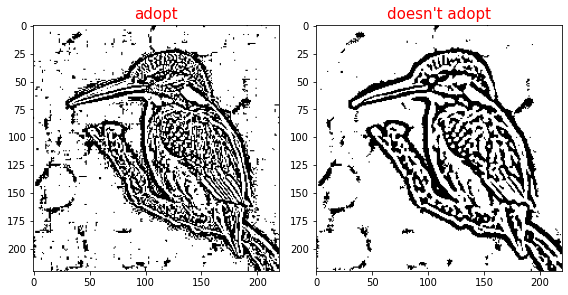

In [ ]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.title("adopt", fontsize = 15, color = 'r')
plt.imshow(adaptive_theshold_gaussian, cmap = 'gray')

nonadopt_adaptive_theshold_gaussian = cv2.adaptiveThreshold(gaussian_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.subplot(1, 2, 2)
plt.title("doesn't adopt", fontsize = 15, color = 'r')
plt.imshow(nonadopt_adaptive_theshold_gaussian, cmap = 'gray')

plt.tight_layout()

**用經過高斯濾波的邊緣資訊以及經過高斯濾波的二值化影像生成影像**

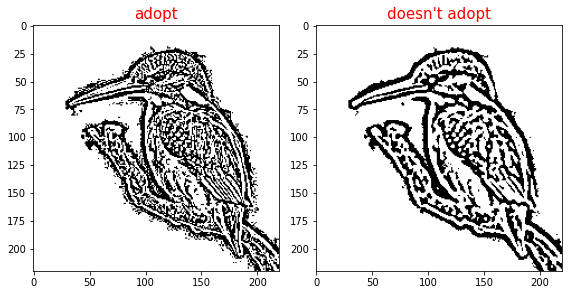

In [ ]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.title("adopt", fontsize = 15, color = 'r')
plt.imshow(reduce_noise_img, cmap = 'gray')

nonadopt_reduce_noise_img1 = reduce_noise(nonadopt_adaptive_theshold_gaussian, edges_img, 6)

plt.subplot(1, 2, 2)
plt.title("doesn't adopt", fontsize = 15, color = 'r')
plt.imshow(nonadopt_reduce_noise_img1, cmap = 'gray')

plt.tight_layout()

**用未經過高斯濾波的邊緣資訊以及經過高斯濾波的二值化影像生成影像**

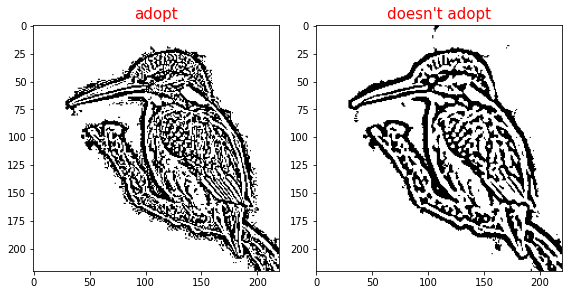

In [ ]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.title("adopt", fontsize = 15, color = 'r')
plt.imshow(reduce_noise_img, cmap = 'gray')

nonadopt_reduce_noise_img2 = reduce_noise(nonadopt_adaptive_theshold_gaussian, nonadopt_edges_img, 6

plt.subplot(1, 2, 2)
plt.title("doesn't adopt", fontsize = 15, color = 'r')
plt.imshow(nonadopt_reduce_noise_img2, cmap = 'gray')

plt.tight_layout()

**用未經過高斯濾波的邊緣資訊以及未經過高斯濾波的二值化影像生成影像**

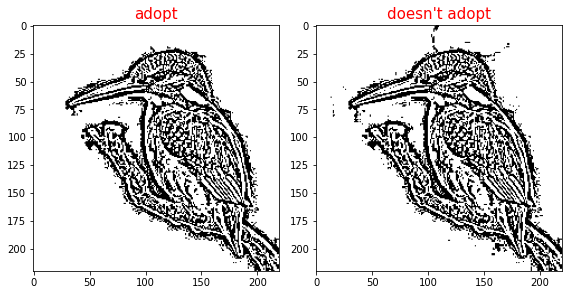

In [ ]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.title("adopt", fontsize = 15, color = 'r')
plt.imshow(reduce_noise_img, cmap = 'gray')

nonadopt_reduce_noise_img3 = reduce_noise(adaptive_theshold_gaussian, nonadopt_edges_img, 6)

plt.subplot(1, 2, 2)
plt.title("doesn't adopt", fontsize = 15, color = 'r')
plt.imshow(nonadopt_reduce_noise_img3, cmap = 'gray')

plt.tight_layout()